In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.0.0


In [9]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


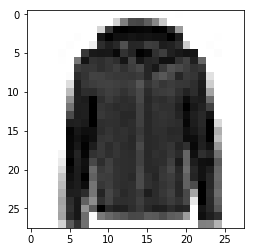

In [10]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.show()


show_single_image(x_train[0])

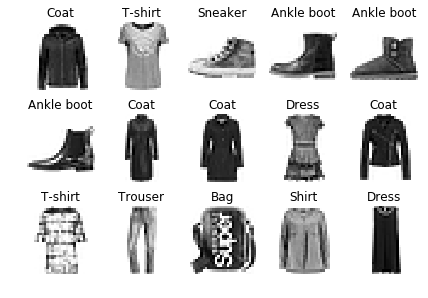

In [12]:
def show_imags(n_rows,n_cols,x_data,y_data,class_names):
   assert len(x_data)==len(y_data)
   assert n_rows*n_cols < len(x_data)
   plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
   for row in range(n_rows):
       for col in range(n_cols):
           index = n_cols*row+col
           plt.subplot(n_rows,n_cols,index+1)
           plt.imshow(x_data[index],cmap = "binary",interpolation="nearest")
           plt .axis("off")#不显示坐标尺寸
           plt.title(class_names[y_data[index]])
   plt.show()

class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
               'Sneaker','Bag','Ankle boot']
show_imags(3,5,x_train,y_train,class_names)


In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation = 'relu'))
model.add(keras.layers.Dense(100,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'sgd',
              metrics = ['accuracy'])

model.layers
# model.summmary()

In [25]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape = [28,28]),
keras.layers.Dense(300,activation = 'relu'),
keras.layers.Dense(100,activation = 'relu'),
keras.layers.Dense(10,activation = 'softmax')])

model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'sgd',
              metrics = ['accuracy'])

model.layers

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 53us/sample - loss: 550107146054269.0625 - accuracy: 0.0987 - val_loss: 2.3031 - val_accuracy: 0.0976
Epoch 2/10
55000/55000 [==============================] - 3s 49us/sample - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3031 - val_accuracy: 0.0980
Epoch 3/10
55000/55000 [==============================] - 3s 49us/sample - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3031 - val_accuracy: 0.0914
Epoch 4/10
55000/55000 [==============================] - 3s 49us/sample - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3031 - val_accuracy: 0.0980
Epoch 5/10
55000/55000 [==============================] - 3s 48us/sample - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3032 - val_accuracy: 0.0914
Epoch 6/10
55000/55000 [==============================] - 3s 49us/sample - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3034 - val_accuracy: 0.0914
Epoch 7/10
55000/55000 [===================

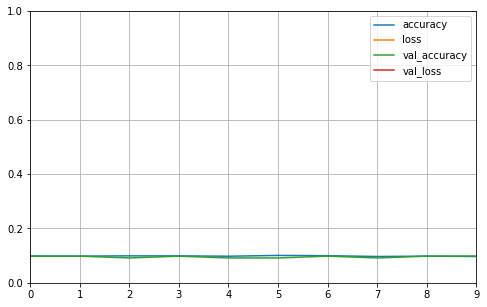

In [26]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [27]:
print(history.history)

{'loss': [550107146054269.06, 2.3026916671406137, 2.302689049911499, 2.302698276172985, 2.3026913590517912, 2.3026648727763783, 2.302663513148915, 2.302685605205189, 2.3026827203924007, 2.3026994065371427], 'accuracy': [0.09869091, 0.09823637, 0.09912727, 0.099072725, 0.097763635, 0.100763634, 0.09974545, 0.09678182, 0.098127276, 0.096745454], 'val_loss': [2.3030689834594726, 2.3031083351135253, 2.303110585021973, 2.3031354000091553, 2.3032395088195803, 2.303388798904419, 2.3032322891235353, 2.303336365509033, 2.3031332313537596, 2.3032260227203367], 'val_accuracy': [0.0976, 0.098, 0.0914, 0.098, 0.0914, 0.0914, 0.098, 0.0914, 0.098, 0.0984]}
